#Разработка модели SVM

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


#Загрузка дата сета processed_dataset

In [4]:
# Load the dataset
#file_path = 'processed_dataset.csv'

current_directory = os.getcwd()
print(f"Current_directory:{current_directory}")
file_path = os.path.join(current_directory, 'datasets/processed_dataset.csv')

data = pd.read_csv(file_path)

data.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg,churn
0,1,0,11.95,25,0.14,8.4,2.3,0
1,0,0,8.22,0,0.00,0.0,0.0,1
2,1,0,8.91,16,0.00,13.7,0.9,1
3,0,0,6.87,21,0.00,0.0,0.0,1
4,0,0,6.39,0,0.00,0.0,0.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71882 entries, 0 to 71881
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             71882 non-null  int64  
 1   is_movie_package_subscriber  71882 non-null  int64  
 2   subscription_age             71882 non-null  float64
 3   bill_avg                     71882 non-null  int64  
 4   reamining_contract           71882 non-null  float64
 5   download_avg                 71882 non-null  float64
 6   upload_avg                   71882 non-null  float64
 7   churn                        71882 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 4.4 MB


In [6]:
data.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg,churn
count,71882.000000,71882.000000,71882.000000,71882.000000,71882.000000,71882.000000,71882.000000,71882.000000
mean,0.815308,0.334103,2.455431,18.960964,0.497667,43.492609,4.174503,0.557163
std,0.388050,0.471679,2.026719,12.383929,0.665780,58.734734,9.693839,0.496725
min,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.940000,13.000000,0.000000,6.700000,0.500000,0.000000
50%,1.000000,0.000000,1.980000,19.000000,0.000000,27.800000,2.100000,1.000000
75%,1.000000,1.000000,3.300000,22.000000,1.030000,60.400000,4.800000,1.000000
max,1.000000,1.000000,12.800000,285.000000,2.920000,3179.800000,453.300000,1.000000


#Построение графиков на основе загруженного датасета processed_dataset

<Figure size 1500x1000 with 0 Axes>

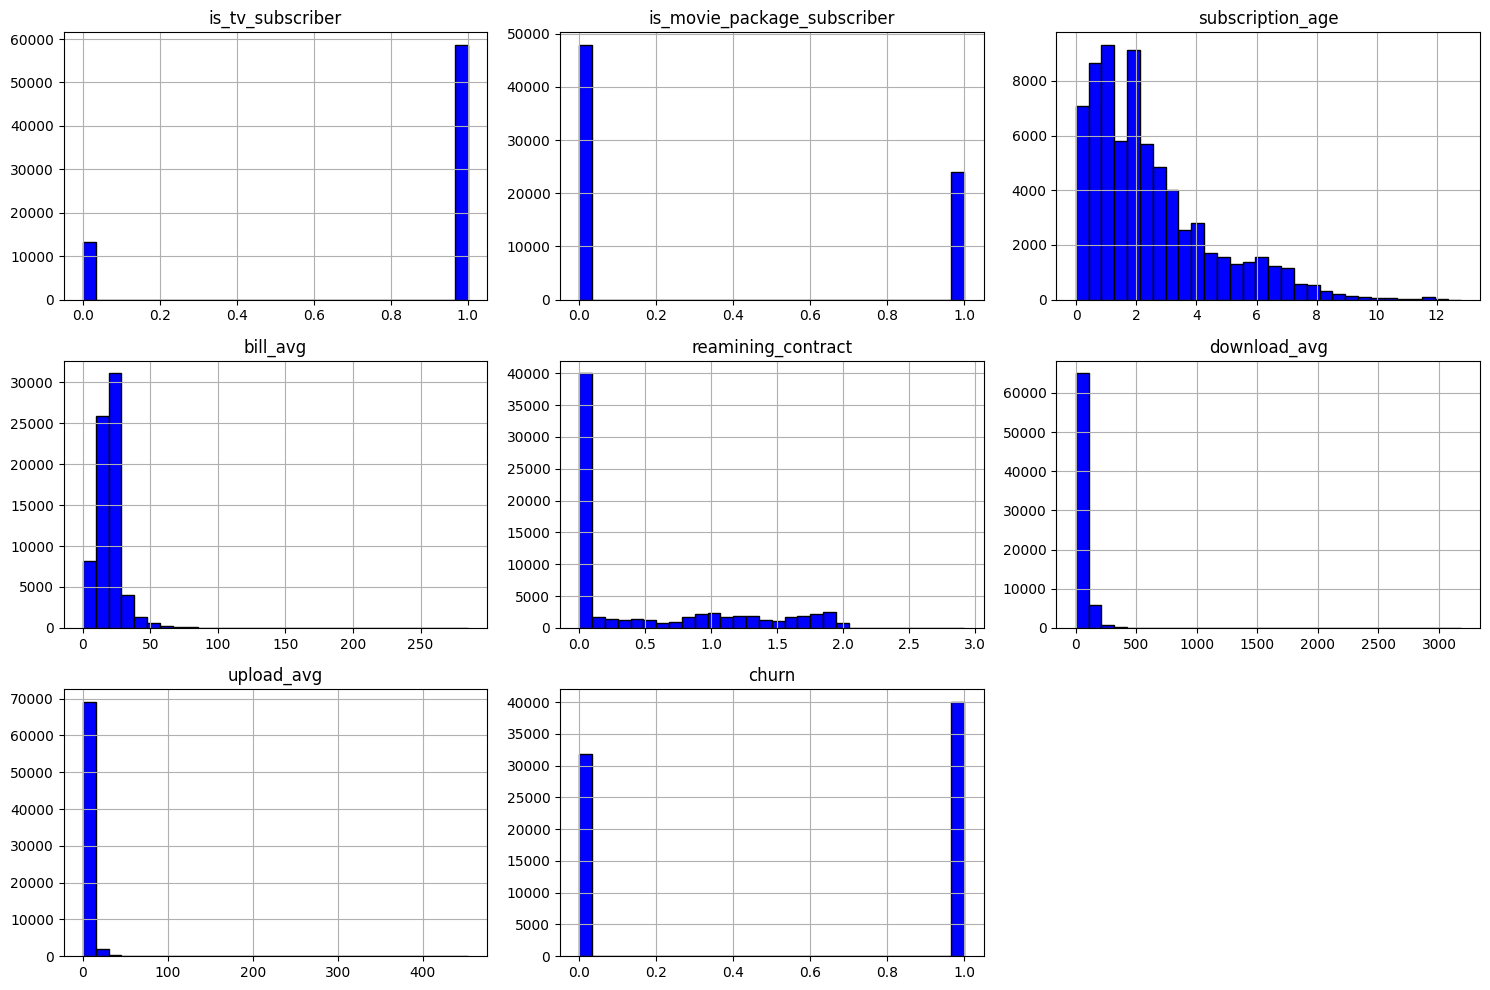

In [7]:
# Set up the matplotlib figure size
plt.figure(figsize=(15, 10))

# Plot histograms for each feature
data.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

#Построение корреляционной матрицы на основе датасета processed_dataset

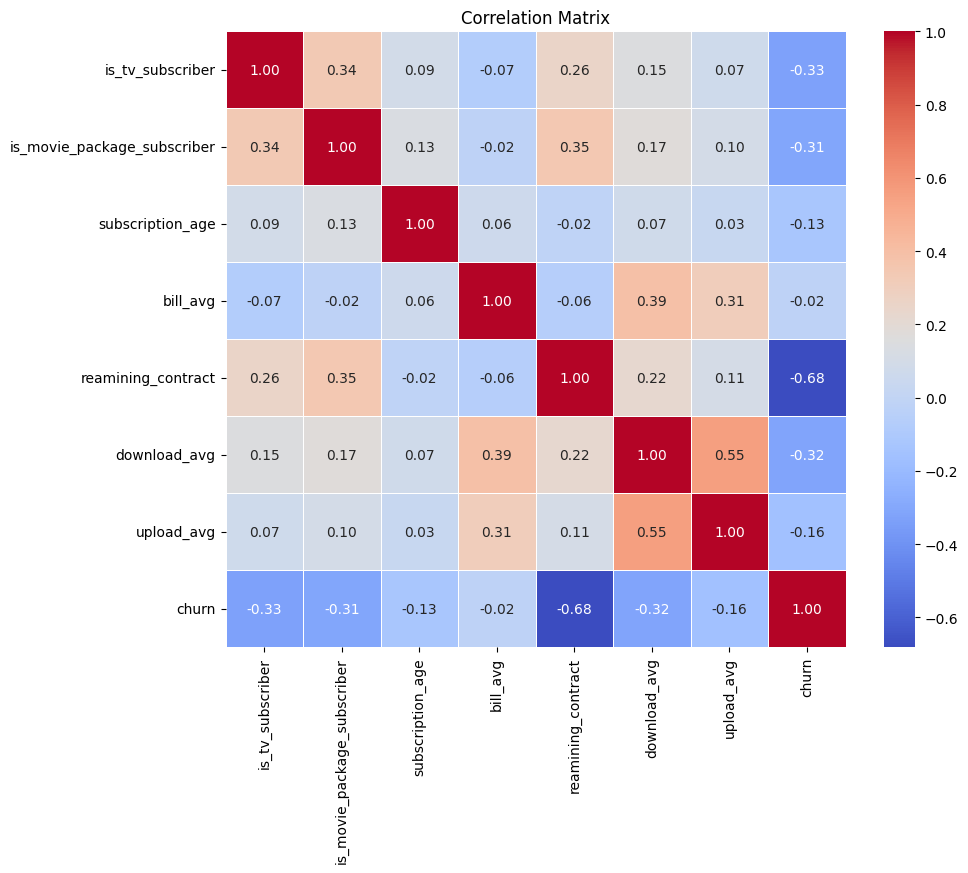

In [8]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#Подготовка данных для создание модели SVM

In [9]:
# Separate features and target
X = data.drop('churn', axis=1)
y = data['churn']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]  # Displaying first 5 scaled samples for both sets


(array([[ 0.47491528, -0.70911821, -0.17038099, -1.52850599, -0.7475965 ,
         -0.60599068,  0.19729808],
        [-2.10563873, -0.70911821,  0.24892009,  1.28995407, -0.7475965 ,
          1.02585406,  0.22797893],
        [-2.10563873, -0.70911821, -0.10625259,  0.24309747, -0.7475965 ,
         -0.74268972, -0.42654594],
        [ 0.47491528,  1.41020212, -0.89552522, -0.32059454,  1.2476665 ,
         -0.09166056, -0.00724094],
        [-2.10563873, -0.70911821,  0.56956209, -1.52850599, -0.7475965 ,
         -0.69142758, -0.38563813]]),
 array([[ 0.47491528, -0.70911821, -0.28877189, -0.15953968, -0.7475965 ,
         -0.61282564, -0.39586508],
        [ 0.47491528, -0.70911821, -0.68834115,  0.08204261,  0.63258543,
          0.11851421,  0.18707113],
        [ 0.47491528,  1.41020212,  2.01985053,  0.56520719,  0.01750435,
          1.06344629,  0.61660308],
        [ 0.47491528, -0.70911821, -0.82153091, -0.88428655,  0.19752808,
          0.26888315, -0.0788296 ],
        

#Создание pipeline для имитации и обучения модели SVM

In [10]:
# Імпутер для заповнення NaN значень
imputer = SimpleImputer(strategy='median')

# Створення пайплайну для імпутації та навчання моделі SVM
pipeline = Pipeline(steps=[('imputer', imputer),
                           ('scaler', StandardScaler()),
                           ('svc', SVC(kernel='rbf', C=1.0, random_state=42))])

# Навчання моделі
pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('svc', SVC(random_state=42))])

#Оценивание модели

In [11]:
# Оцінювання моделі
y_pred = pipeline.predict(X_test)


#Оценка модели

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9138206858176253
Precision: 0.9183095120749137
Recall: 0.9282600572923153
F1 Score: 0.9232579746051409


#Сохраенения модели в файл

In [13]:
import pickle

# Сохранение модели в файл с расширением .pkl
with open('model_svm_processed_dataset.pkl', 'wb') as file:
    pickle.dump(data, file)


#Загрузка модели

In [ ]:
import pickle

# Загрузка модели из файла
with open('model_svm_processed_dataset.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Теперь вы можете использовать загруженную модель
